In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import tensorflow as tf
from tensorflow import keras

In [3]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [4]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

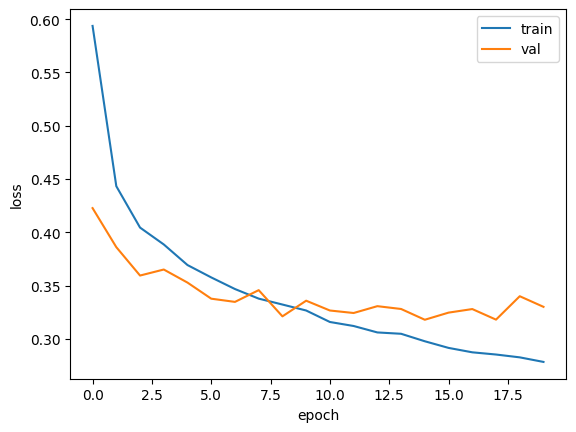

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

In [7]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [8]:
model.save_weights('model-weights.h5')

In [9]:
model.save('model-whole.keras')

In [10]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [11]:
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 1ms/step
0.8816666666666667


In [12]:
model = keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3277 - accuracy: 0.8817


[0.327745646238327, 0.8816666603088379]

In [13]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras')
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [14]:
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3293 - accuracy: 0.8830


[0.32929226756095886, 0.8830000162124634]

In [15]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [16]:
print(early_stopping_cb.stopped_epoch)

10


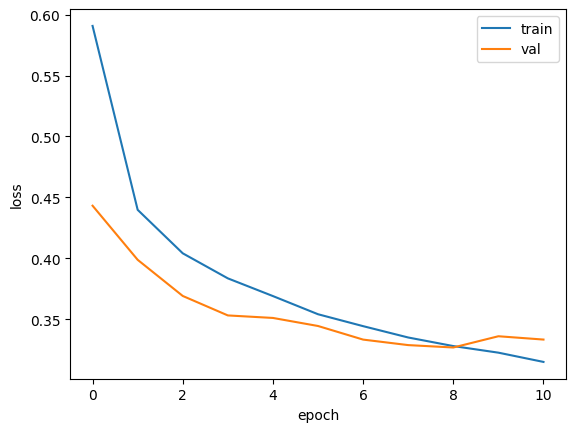

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

In [18]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3268 - accuracy: 0.8794


[0.3267901539802551, 0.8794166445732117]

In [19]:
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu', padding='same', strides=1)

In [20]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [21]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

In [22]:
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [23]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3136)              0         
                                                                 
 dense_10 (Dense)            (None, 100)              

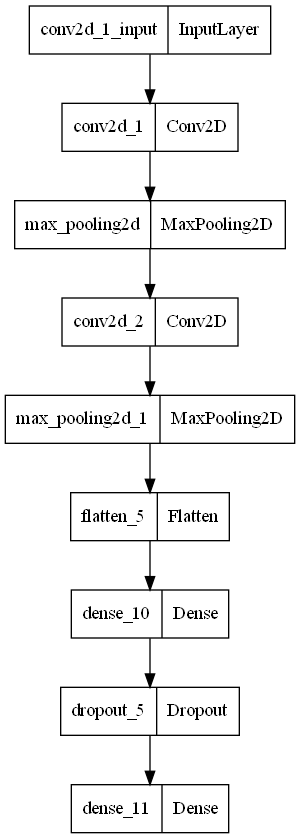

In [25]:
keras.utils.plot_model(model)

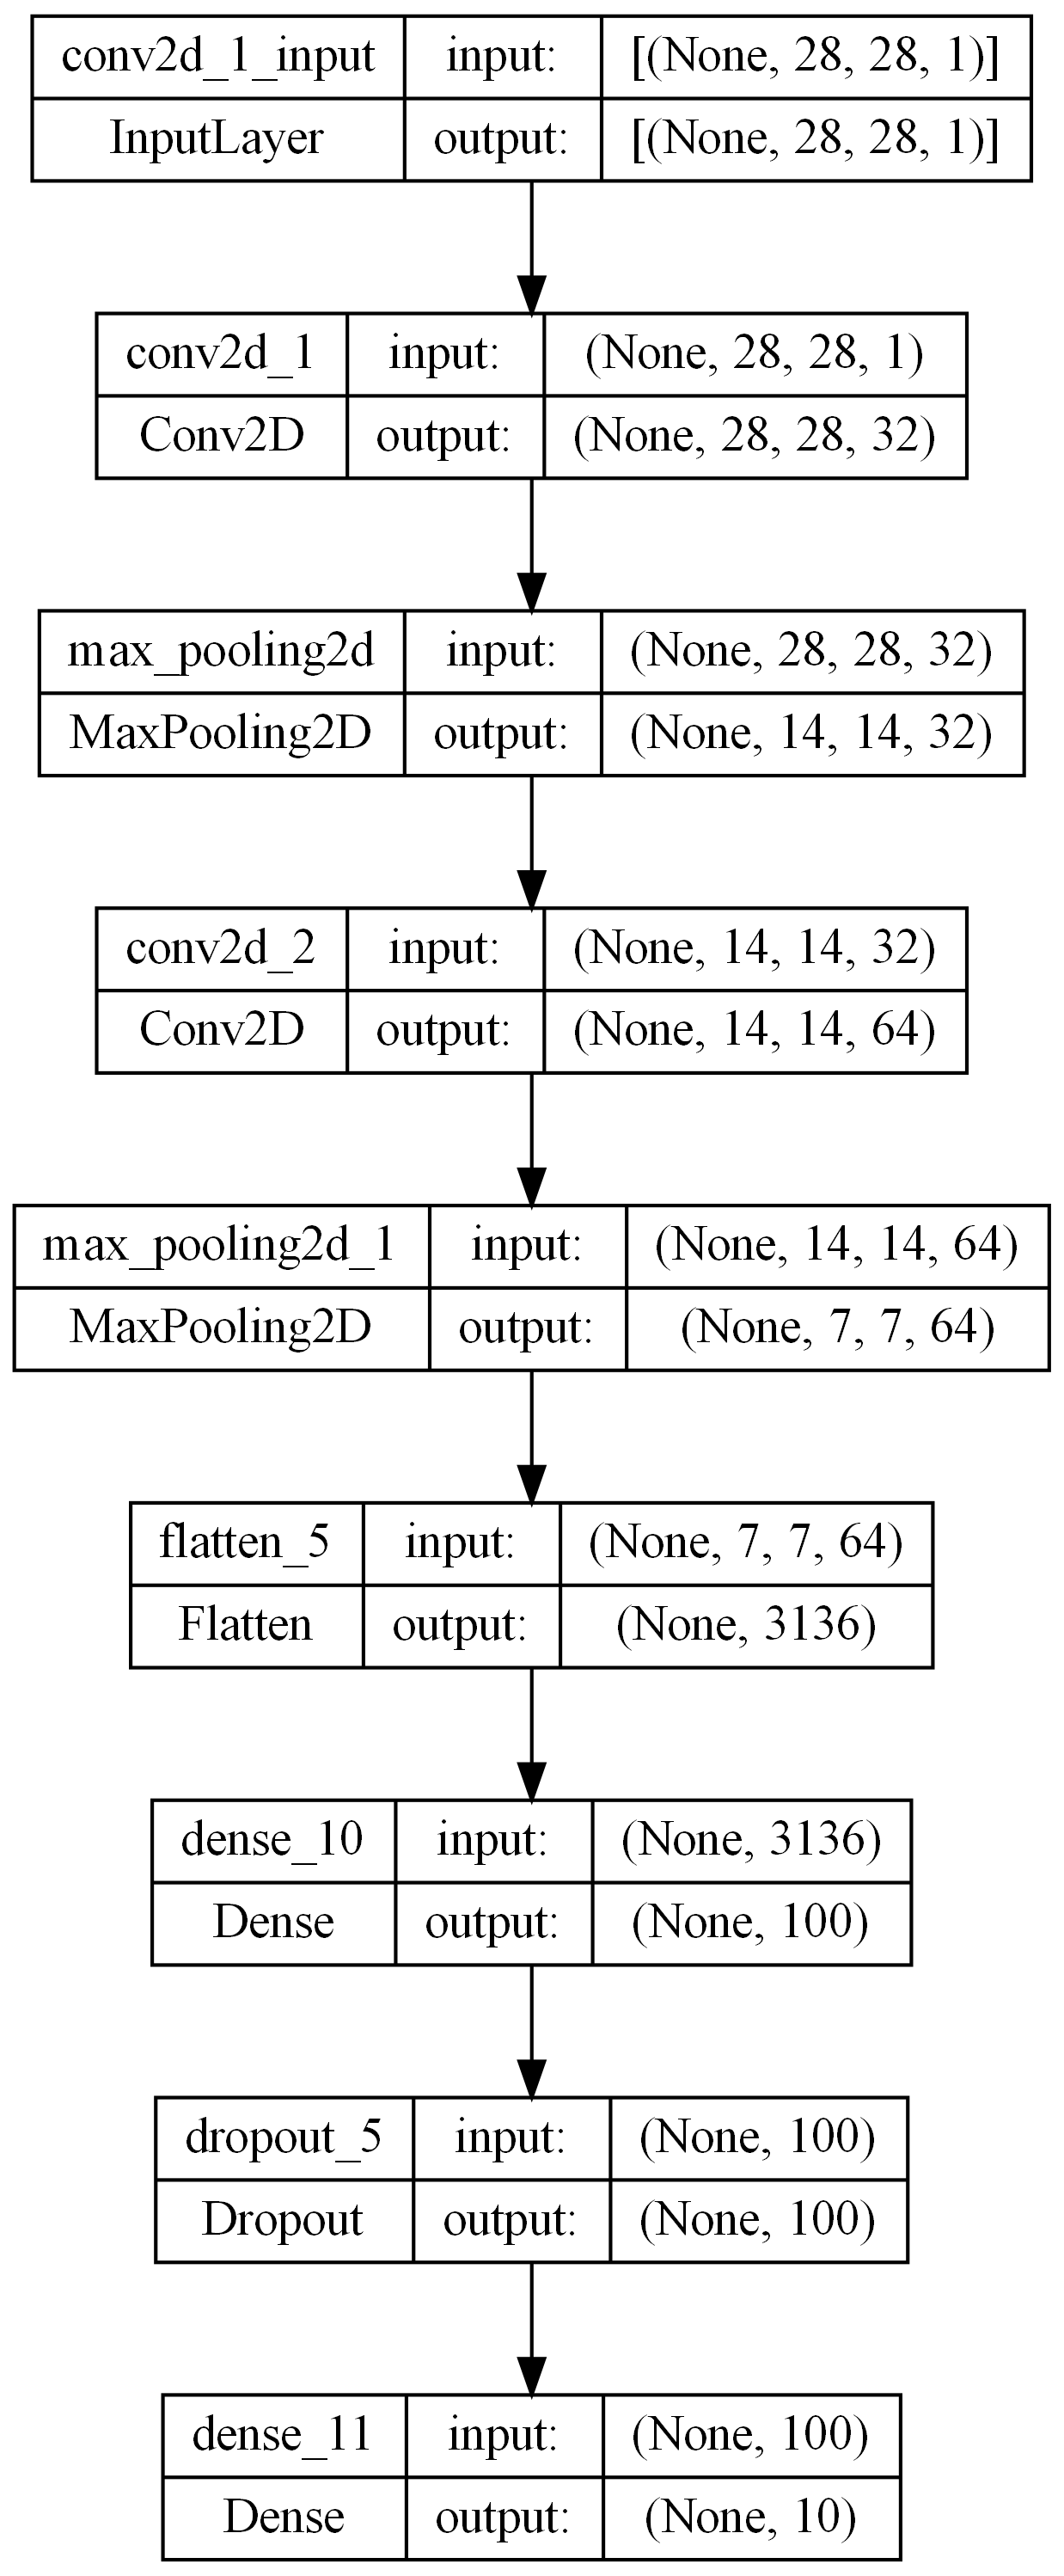

In [26]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 27s 17ms/step - loss: 0.3883 - accuracy: 0.8610 - val_loss: 0.3035 - val_accuracy: 0.8905
Epoch 2/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.3166 - accuracy: 0.8866 - val_loss: 0.2782 - val_accuracy: 0.8947
Epoch 3/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2822 - accuracy: 0.8989 - val_loss: 0.2537 - val_accuracy: 0.9056
Epoch 4/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2521 - accuracy: 0.9079 - val_loss: 0.2350 - val_accuracy: 0.9146
Epoch 5/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2330 - accuracy: 0.9155 - val_loss: 0.2309 - val_accuracy: 0.9153
Epoch 6/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2151 - accuracy: 0.9202 - val_loss: 0.2226 - val_accuracy: 0.9185
Epoch 7/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.1987 - accuracy: 0.9263 - val_loss: 0.2195 -

In [29]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 9ms/step - loss: 0.2187 - accuracy: 0.9208


[0.21874959766864777, 0.9208333492279053]

In [30]:
print(early_stopping_cb.stopped_epoch)

9


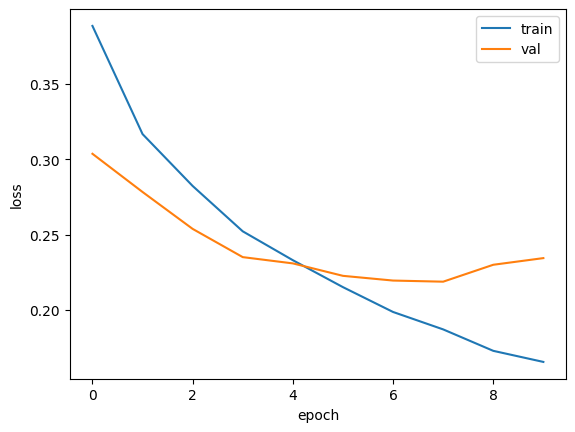

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

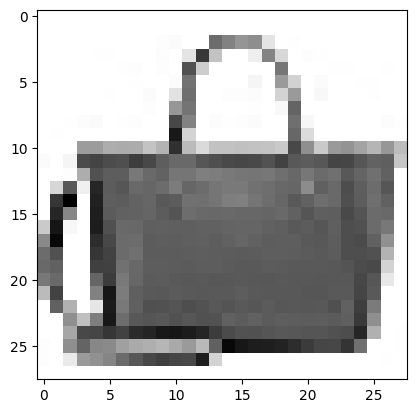

In [32]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')

In [34]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 16ms/step
[[1.5535033e-17 4.3634499e-22 4.9550154e-20 4.1211128e-21 5.3387164e-20
  1.8128998e-17 2.4686094e-17 3.0608168e-17 1.0000000e+00 1.9959120e-15]]


Text(0, 0.5, 'prob.')

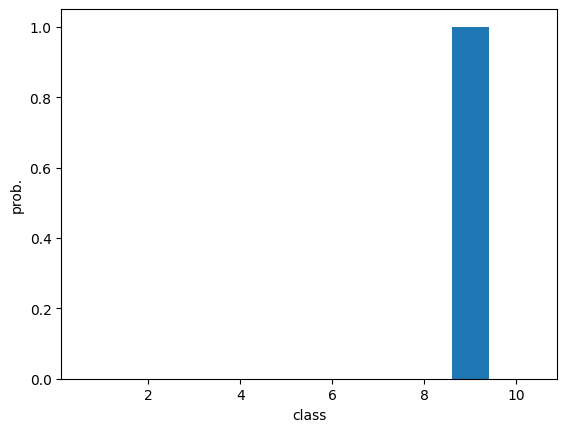

In [37]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')

In [38]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [40]:
print(classes[np.argmax(preds[0])])

가방


In [41]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [42]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2465 - accuracy: 0.9122


[0.24652428925037384, 0.9121999740600586]